In [2]:
pwd

'E:\\Python'

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st 
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [4]:
DrugExpenses=pd.read_excel('E:\Python\Data\DrugExpenses.xlsx','Data')[['Out-Of-Pocket Drug Expenses']]

In [5]:
DrugExpenses.head()

,Out-Of-Pocket Drug Expenses
0,200.31
1,143.38
2,164.43
3,179.59
4,199.88


In [6]:
DrugExpenses

,Out-Of-Pocket Drug Expenses
0,200.31
1,143.38
2,164.43
3,179.59
4,199.88
...,...
191,143.01
192,166.13
193,202.37
194,201.32


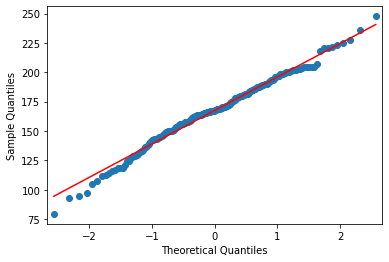

In [7]:
qqplot(DrugExpenses['Out-Of-Pocket Drug Expenses'], line='s')
pyplot.show()

In [8]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
#(Shapiro Wikk Test) , sample size less than 50 
confidence_level = 0.95 #specify the confidence level
alpha = (1-confidence_level) #calculate alpha 
x = DrugExpenses['Out-Of-Pocket Drug Expenses']
stats, p = shapiro(x)
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed')
print()
print('Shapiro Statistics=%.3f, p_value=%.3f' % (stats, p))
print()

H_null - Data is normally distributed
H_alt - Data is not normally distributed

Shapiro Statistics=0.990, p_value=0.185



In [9]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import kstest 
#(Kolmogorov Smirnov Test) , sample size more than 50 
confidence_level = 0.95 #specify the confidence level
alpha = (1-confidence_level) #calculate alpha 
x = DrugExpenses['Out-Of-Pocket Drug Expenses']
loc, scale = norm.fit(x) 
n = norm(loc=loc, scale=scale)# create a normal distribution with loc and s 
stats,pvalue=stats.kstest(x,n.cdf) #return KS value and P-value
print('Hypothesis Statement')
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed')
print()
print('Kolmogorov-Smirnov Statistics=%.3f, p_value=%.3f' % (stats, pvalue))
print()

Hypothesis Statement
H_null - Data is normally distributed
H_alt - Data is not normally distributed

Kolmogorov-Smirnov Statistics=0.060, p_value=0.466



In [10]:
if p < alpha: 
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

print()

The null hypothesis is accepted
Data is NORMALLY distributed



In [ ]:
#hypothesis statement for one tail test
print('h_null: 2009 average out-of-pocket prescription drug expenses ≥ $173')
print('h_alt: 2009 average out-of-pocket prescription drug expenses < $173 (claim)')
#specify the confidence level
confidence_level= 0.99
#calculate significance level alpha
alpha=(1-confidence_level)
print()
print('Significance level, α=%.2f '%(alpha))

from scipy.stats import ttest_1samp
#p in ttest_1samp is refering to the hypothesized population mean
tstat,pvalue=ttest_1samp(DrugExpenses['Out-Of-Pocket Drug Expenses'],173)
print()
print("t Statistic: ",tstat.round(3))
#need to divide by 2 because 1 tail test
print('P Value (one sided test): %.5f'%(pvalue/2))
print()

#decision on statistical test
if(pvalue/2)<alpha:
    print('The null hypothesis is rejected as P-value is less than α ')
else:
    print('The null hypothesis is accepted as P-value is more than α')

In [ ]:
print('Mean Value:',DrugExpenses['Out-Of-Pocket Drug Expenses'].mean().round(3),' ')
#calculate the mean difference
Hypo_mean = 173
Mean_Diff = DrugExpenses['Out-Of-Pocket Drug Expenses'].mean().round(3)- Hypo_mean
print('Mean Difference Value:',Mean_Diff.round(3),' ')